In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#Сгенерируем выборку с классами, расположенными в виде луны и попробуем построить решающее дерево
from sklearn.datasets import make_moons
dataset = make_moons(n_samples=1000, noise=0.5, random_state=0)

dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))), columns=['x1', 'x2', "y"])
dataset.head()

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0


In [7]:
dataset["y"].value_counts()
#Сбалансировано

1.0    500
0.0    500
Name: y, dtype: int64

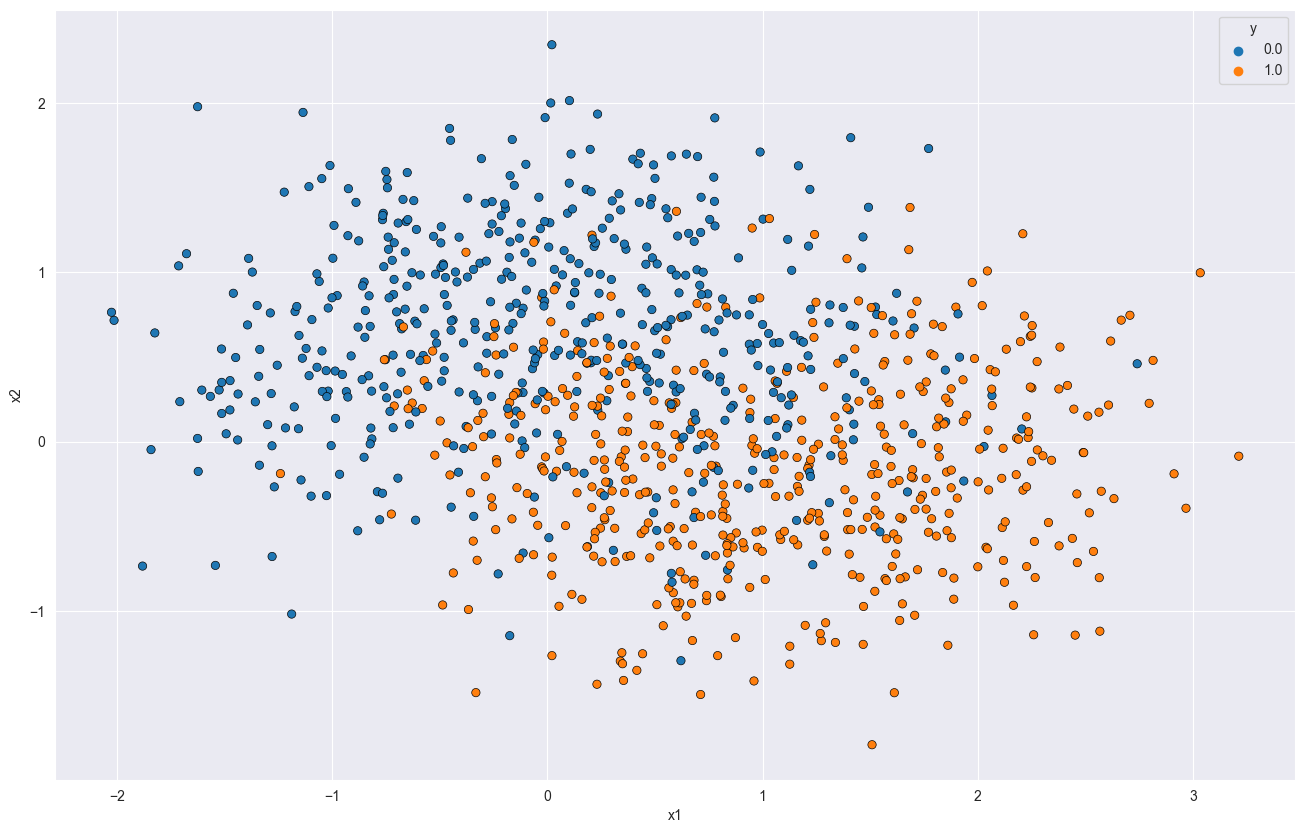

In [8]:
#Изобразим объекты и раскрасим их в классы
import seaborn as sns
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.scatterplot(x="x1", y="x2", hue="y", edgecolor="k", data=dataset)
plt.show()

In [9]:
#Деревья!!!
from sklearn.tree import DecisionTreeClassifier

X = dataset.drop("y", axis=1)
y = dataset["y"]

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X, y)

DecisionTreeClassifier()

In [10]:
#Замерим accuracy
decision_tree.score(X, y)

1.0

E:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary')

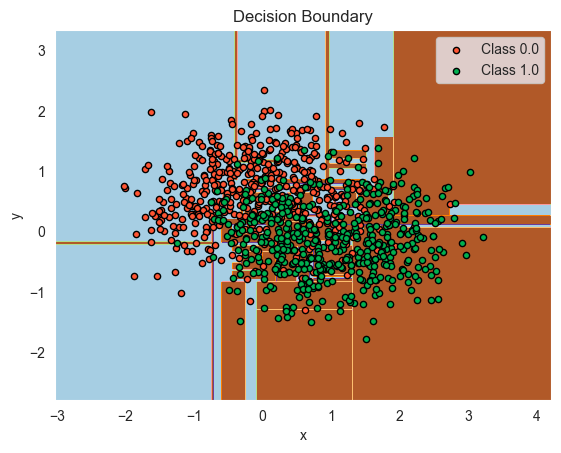

In [12]:
#Визуализируем работу дерева
fig.set_size_inches(30, 20)

### Вычислим границы признакового пространства

pixel_step = 0.02

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

### Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")